In [1]:
#!pip install tensorflow --upgrade  #Install the latest TensorFlow version
#!pip install keras
#!pip install tensorflow_datasets   #Run one time
#!pip install gitpython
import tensorflow as tf
import tensorflow.keras as keras

import tensorflow.keras as tfk
import tensorflow.keras.layers as tkl
print('Tensorflow:{}'.format(tf.__version__))
print('Keras:{}'.format(tfk.__version__))
import pandas as pd
import numpy as np
#import tensorflow_datasets as tfds

Tensorflow:2.3.0
Keras:2.4.0


In [2]:
#import git
!git clone https://github.com/KunaCornejo/RainAttenuationPrediction.git

fatal: destination path 'RainAttenuationPrediction' already exists and is not an empty directory.


In [3]:
ls 'RainAttenuationPrediction'

Matriz_Arain.csv.zip  RainAttenuationPrediction/  README.md


In [4]:
#Unzip the .csv file
import zipfile #import ZipFile
with zipfile.ZipFile('/content/RainAttenuationPrediction/Matriz_Arain.csv.zip','r') as zip_ref:
    zip_ref.extractall('content')

In [5]:
from numpy import genfromtxt
matrix_input = genfromtxt('content/Matriz_Arain.csv', delimiter=',') #Matrix_Arain.csv contains the rain attenuation time series obtained from ITU-R P1853-1 by each site
matrix_input=np.transpose(matrix_input)
print(matrix_input[:,:].shape)

(25, 525601)


(525601,)


NameError: ignored

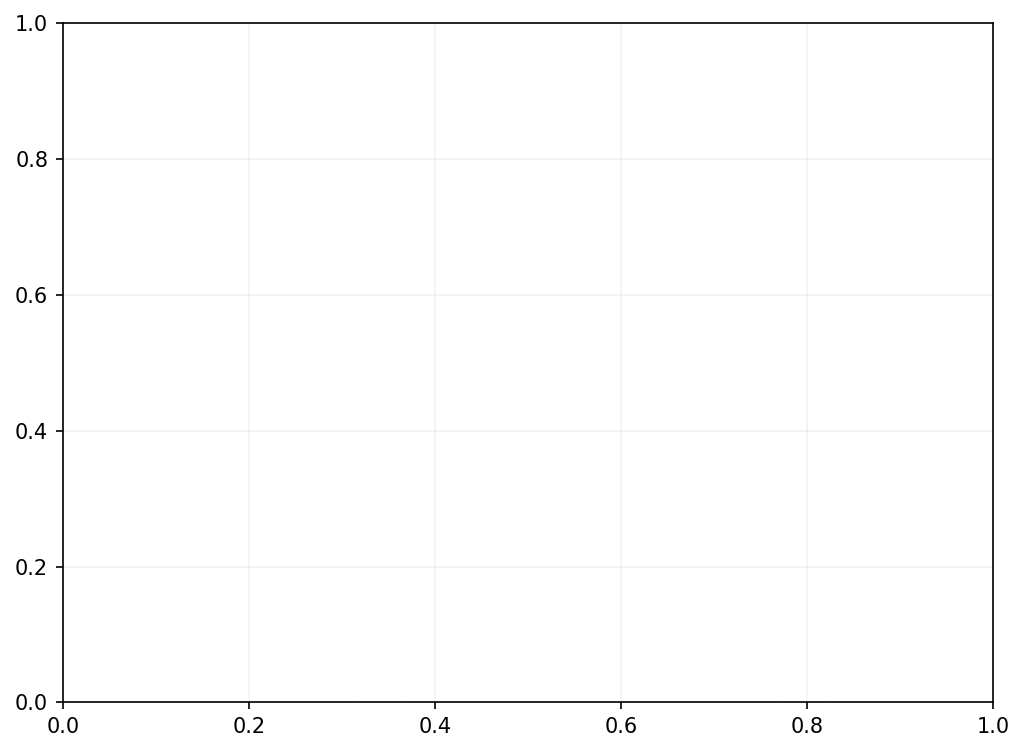

In [6]:
index=24 #Indicates the location to train [MANUALLY]

print(matrix_input[index,:].shape)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import grid
figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
grid(color='k', linestyle=':', linewidth=.1)
plt.plot(matriz_input[index,:],'s-',linewidth=.1,markersize=2)

In [112]:
keras.backend.clear_session()
dataset=matrix_input[index]
print(dataset.shape)

(525601,)


In [113]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [114]:
# fix random seed for reproducibility
np.random.seed(7)
dataset = dataset.astype('float32')

#Partition Dataset
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

# normalize the dataset, by feature scaling

mu=np.min(train)
sig=(np.max(train)-np.min(train))

train=(train-mu)/sig
test=(test-mu)/sig

367920 157681


In [115]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [116]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [117]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainY = np.reshape(trainY, (trainY.shape[0], 1))

In [132]:
Training=0
#!sudo pip install h5p
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.models import load_model
from pandas import DataFrame

Training+=1
model=Sequential()
model.add(LSTM(200, input_shape=(look_back,1),activation='tanh', bias_initializer='normal',kernel_regularizer=regularizers.l2(1e-4))) 
model.add(Dropout(0.2)) #0.2
model.add(Dense(75,activation='tanh', bias_initializer='normal')) 
model.add(Dense(50,activation='tanh', bias_initializer='normal')) 
model.add(Dense(25,activation='tanh', bias_initializer='normal')) 
model.add(Dense(5, activation='tanh', bias_initializer='normal'))     
model.add(Dense(1,activation='selu', bias_initializer='normal')) 
keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.9, amsgrad=False)
model.compile(optimizer='adam', loss='mae', metrics=['mae']) 

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5) #patience=5 val_loss
#mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history=model.fit(trainX, trainY, epochs=250, batch_size=1024, verbose=1, validation_data=(testX, testY), shuffle=False, callbacks=[es], workers=2, use_multiprocessing=True)
model.summary()

Epoch 1/250
360/360 [==============================] - 17s 48ms/step - loss: 0.0139 - mae: 0.0138 - val_loss: 0.0070 - val_mae: 0.0070
Epoch 2/250
360/360 [==============================] - 16s 45ms/step - loss: 0.0079 - mae: 0.0078 - val_loss: 0.0031 - val_mae: 0.0031
Epoch 3/250
360/360 [==============================] - 16s 45ms/step - loss: 0.0053 - mae: 0.0053 - val_loss: 0.0053 - val_mae: 0.0053
Epoch 4/250
360/360 [==============================] - 16s 45ms/step - loss: 0.0045 - mae: 0.0045 - val_loss: 0.0048 - val_mae: 0.0048
Epoch 5/250
360/360 [==============================] - 16s 46ms/step - loss: 0.0038 - mae: 0.0038 - val_loss: 0.0017 - val_mae: 0.0017
Epoch 6/250
360/360 [==============================] - 16s 45ms/step - loss: 0.0038 - mae: 0.0038 - val_loss: 7.5563e-04 - val_mae: 7.5351e-04
Epoch 7/250
360/360 [==============================] - 16s 45ms/step - loss: 0.0029 - mae: 0.0029 - val_loss: 0.0019 - val_mae: 0.0019
Epoch 8/250
360/360 [==========================

KeyboardInterrupt: ignored

In [119]:
hist = pd.DataFrame(history.history)
ubicaciones=['Panama','San Jose','Tegucigalpa','CDMX','Monterrey','Guadalajara'\
             ,'Tijuana','La Habana','Sto. Domingo','San Salvador','San Juan',\
             'Torreon','La Paz (BC)','Veracruz','Cancun','Chihuahua','Queretaro'\
             ,'Tuxtla (Gtz)','Cd. Juarez','San Pedro Sula','Belmopan','Kingston'\
             ,'Merida','Pto. Cabezas','Oaxaca']
hist =pd.DataFrame(history.history)
print(hist)

        loss       mae  val_loss   val_mae
0   0.004511  0.004462  0.001123  0.001080
1   0.001267  0.001210  0.000651  0.000582
2   0.001230  0.001154  0.000629  0.000549
3   0.001099  0.001018  0.001064  0.000983
4   0.001117  0.001037  0.001260  0.001183
5   0.001068  0.000993  0.000962  0.000889
6   0.001143  0.001074  0.000648  0.000585
7   0.001024  0.000965  0.000998  0.000944
8   0.001107  0.001058  0.001016  0.000972
9   0.001045  0.001007  0.000776  0.000742
10  0.001012  0.000981  0.000798  0.000770
11  0.001000  0.000974  0.000610  0.000588
12  0.001001  0.000982  0.000628  0.000612
13  0.000984  0.000970  0.000636  0.000624
14  0.000988  0.000978  0.000655  0.000645
15  0.000947  0.000939  0.000646  0.000639
16  0.000965  0.000959  0.000927  0.000921
17  0.000949  0.000944  0.000689  0.000684
18  0.000970  0.000965  0.000771  0.000766
19  0.000966  0.000962  0.000587  0.000583
20  0.000959  0.000955  0.000687  0.000684


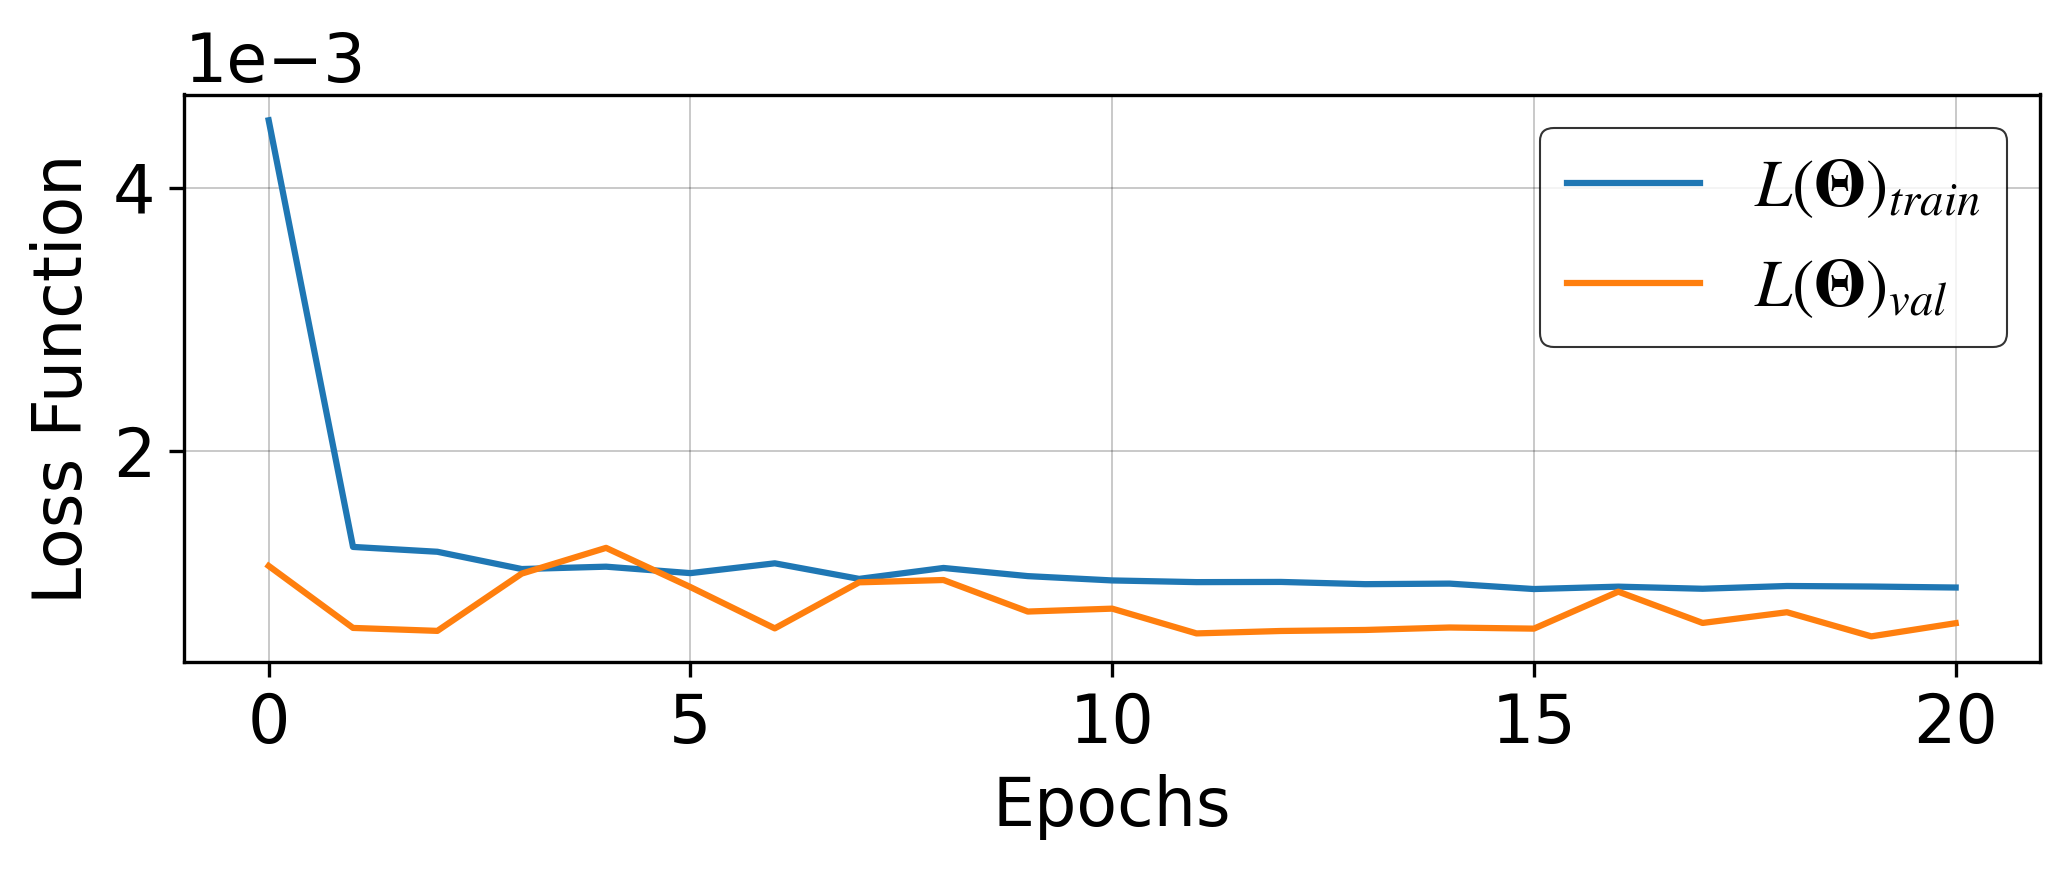

In [120]:
figure(num=None, figsize=(7, 3), dpi=300, facecolor='w', edgecolor='k')
grid(color='k', linestyle=':', linewidth=.1, which='minor', alpha=0.5)
grid(color='k', linestyle='-', linewidth=.1, which='major', alpha=1)

font={'fontname':'Times','weight':'light','size':16}

hist = pd.DataFrame(history.history)

import matplotlib.ticker as mticker

plt.plot(hist["loss"],label=r'$L(\mathbf{\Theta})_{train}$')
plt.plot(hist["val_loss"],label=r'$L(\mathbf{\Theta})_{val}$')
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.ticklabel_format(axis='x', style='Plain',useOffset=False)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5)) #step for x labels

plt.xlabel('Epochs',**font)
plt.ylabel(r'Loss Function',**font) 

leg = plt.legend(loc='best',fontsize=16, edgecolor='k')
leg.get_frame().set_linewidth(0.5)

from pylab import MaxNLocator

plt.rcParams["font.family"] = "Times"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times:italic'
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.tight_layout()

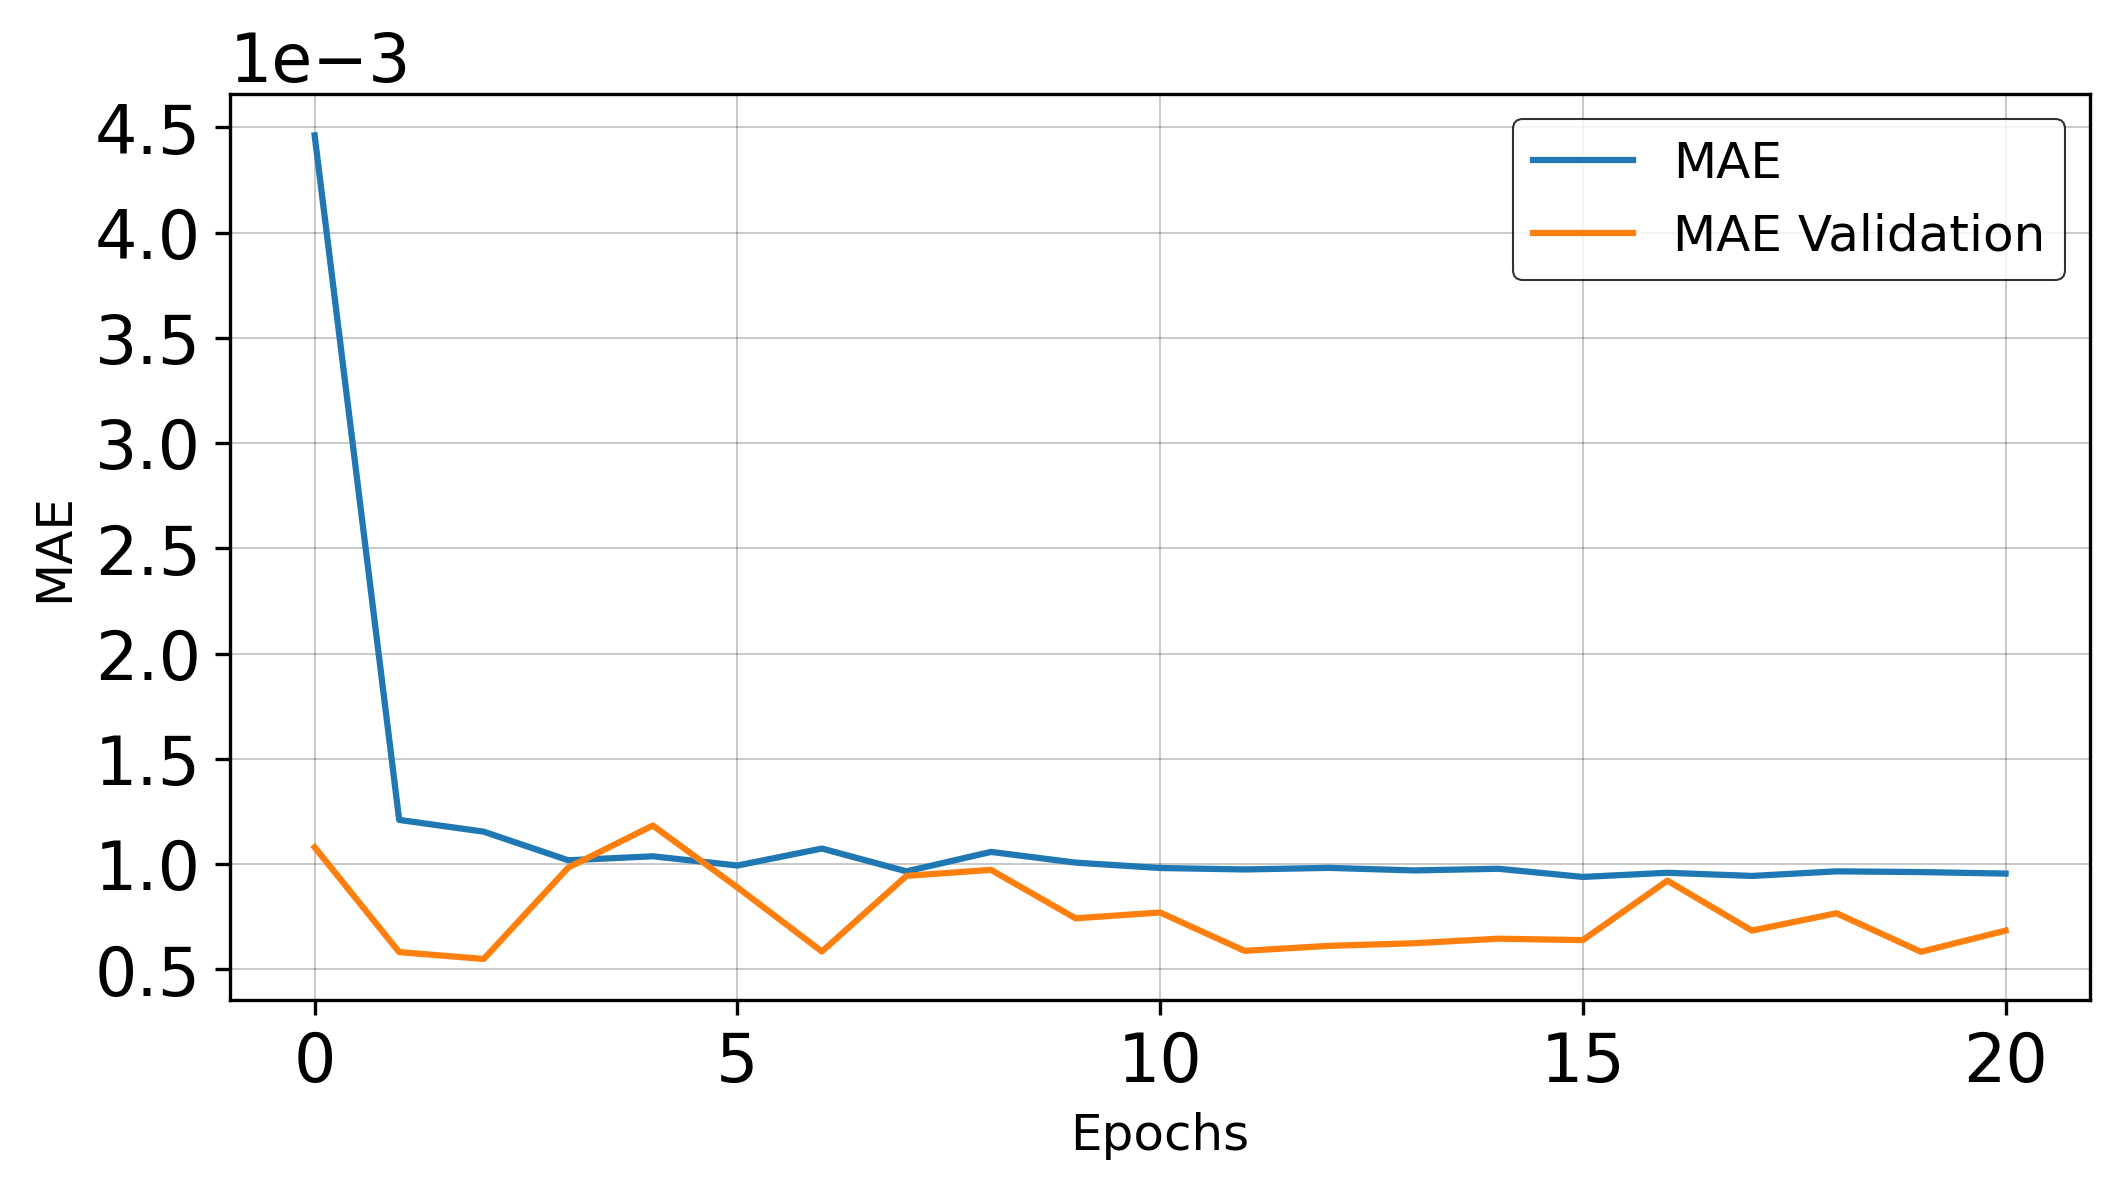

In [121]:
figure(num=None, figsize=(8, 4), dpi=300, facecolor='w', edgecolor='k')
grid(color='k', linestyle=':', linewidth=.1, which='minor', alpha=0.5)
grid(color='k', linestyle='-', linewidth=.1, which='major', alpha=1)

font={'fontname':'Times','weight':'light','size':12}

hist = pd.DataFrame(history.history)
#epoch,loss = hist["loss"]
#plt.plot(epoch-0.5,loss,label=r'$J(\theta)_{train}$')
plt.plot(hist["mae"],label='MAE')
plt.plot(hist["val_mae"],label='MAE Validation')
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.ticklabel_format(axis='x', style='Plain',useOffset=False)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5)) #Da el paso para los x labels

plt.xlabel('Epochs',**font)
plt.ylabel('MAE',**font)

#leg = plt.legend(title=f'Location: {ubicaciones[indice]}',loc='best',fontsize=12, edgecolor='k')
leg = plt.legend(loc='best',fontsize=12, edgecolor='k')
leg.get_frame().set_linewidth(0.5)

plt.rcParams["font.family"] = "Times"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times:italic'
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

4928/4928 [==============================] - 6s 1ms/step
(367918, 1)
Train Score: 1.8866 RMSE
Test Score: 1.4159 RMSE
Train Score: 0.1751 MAE
Test Score: 0.1343 MAE


No handles with labels found to put in legend.


R2 Train = 0.0095
R2 Test =  0.0093
# Trainings = 1


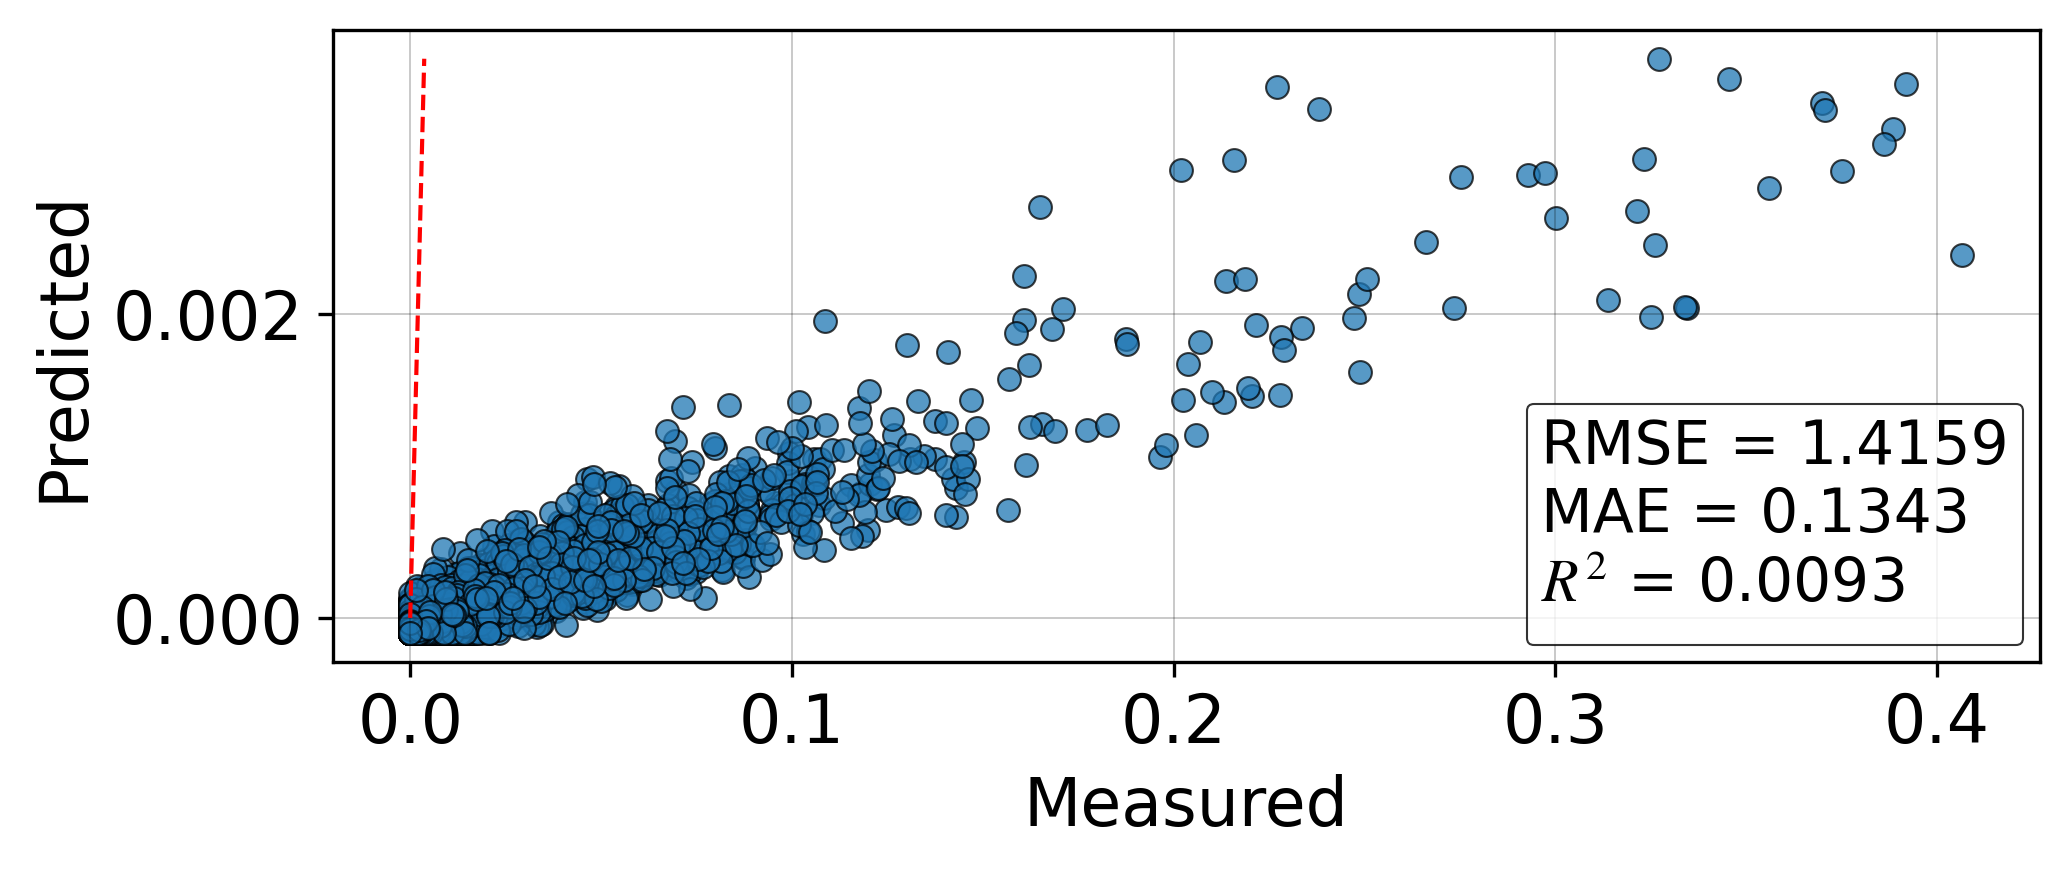

In [131]:
# make predictions
trainPredict = model.predict(trainX, verbose=1)
testPredict = model.predict(testX, verbose=1)
from sklearn.metrics import mean_absolute_error

print(trainPredict.shape)

# invert predictions
trainScore = math.sqrt(mean_squared_error(trainY[:]*sig+mu, trainPredict[:]*sig+mu))
print('Train Score: %.4f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:]*sig+mu, testPredict[:]*sig+mu))

print('Test Score: %.4f RMSE' % (testScore))

trainScore_abs = (mean_absolute_error(trainY[:]*sig+mu, trainPredict[:]*sig+mu))
print('Train Score: %.4f MAE' % (trainScore_abs))
testScore_abs = (mean_absolute_error(testY[:]*sig+mu, testPredict[:]*sig+mu))
print('Test Score: %.4f MAE' % (testScore_abs))

R2_Train = 1-(trainScore**2*len(trainPredict))/np.sum(((trainY*sig+mu)-np.mean(trainY*sig+mu))**2)
R2_Test = 1-(testScore**2)*len(testPredict)/np.sum(((testY*sig+mu)-np.mean(testY*sig+mu))**2)

print('R2 Train = %.4f' % (R2_Train))
print('R2 Test =  %.4f' % (R2_Test))

print(f'# Trainings = {Training}')

figure(num=None, figsize=(7, 3), dpi=300, facecolor='w', edgecolor='k')
grid(color='k', linestyle=':', linewidth=.1, which='minor', alpha=0.5)
grid(color='k', linestyle='-', linewidth=.1, which='major', alpha=1)

font={'fontname':'Times','weight':'light','size':16}

plt.scatter(testY, testPredict,s=30,marker='o',edgecolor='k',alpha=0.75,linewidths=0.5)
plt.plot([testY.min(), testPredict.max()], [testY.min(), testPredict.max()],'r--',lw=1)

leg = plt.legend(title=f'RMSE = {testScore:.4f}\nMAE = {testScore_abs:.4f}\n$R^2$ = {R2_Test:.4f}',loc='best', edgecolor='k',fontsize='small')
leg.get_frame().set_linewidth(0.5)

plt.xlabel('Measured',**font)
plt.ylabel('Predicted',**font)

plt.rcParams["font.family"] = "Times"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times:italic'
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.tight_layout()